In [1]:
import os
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import diagrams as diag

# Paper reconstruction
## Example 1: Anscombes Quartet

In [2]:
path_root_data = os.path.join('..', 'Data')
path_anscombes_quartet = os.path.join(path_root_data, 'Anscombes_Quartet.csv')

df_anscombes_quartet = pd.read_csv(path_anscombes_quartet)
df_anscombes_quartet

x1     y1    x2    y2    x3     y3    x4     y4
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

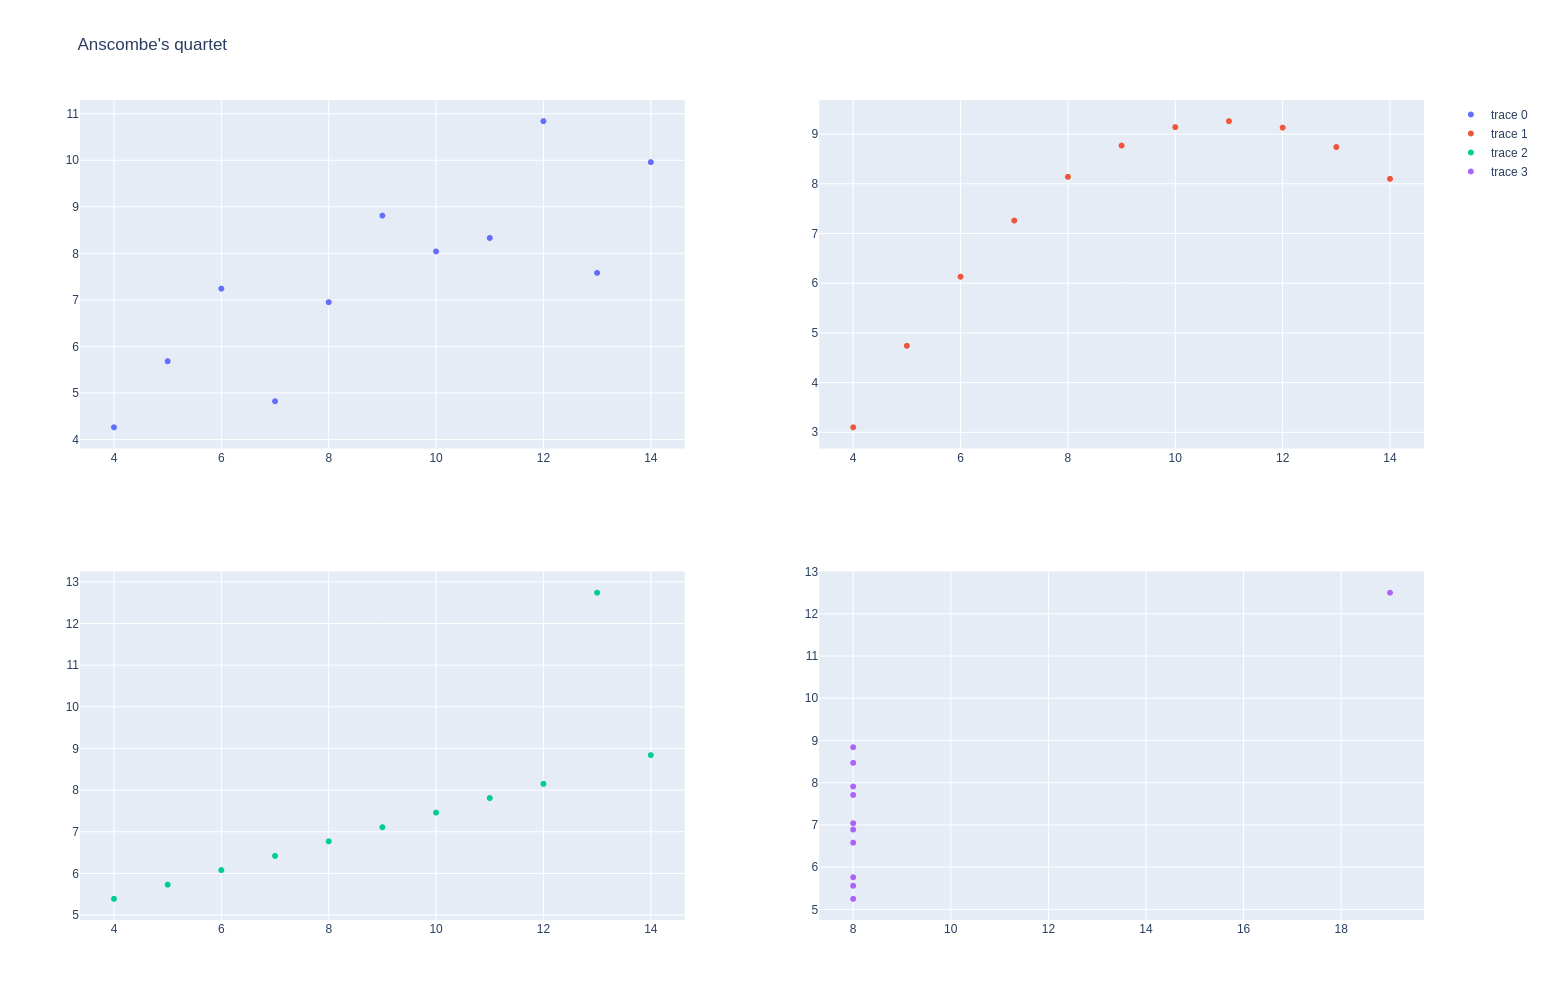

In [3]:
def chart_scatter_anscombes_quartet(df_input):
    
    chart_result = make_subplots(rows=2, cols=2)

    chart_result.add_trace(
        go.Scatter(x=df_input['x1'], y=df_input['y1'], mode="markers"),
        row=1, col=1
    )
    
    chart_result.add_trace(
        go.Scatter(x=df_input['x2'], y=df_input['y2'], mode="markers"),
        row=1, col=2
    )
    
    chart_result.add_trace(
        go.Scatter(x=df_input['x3'], y=df_input['y3'], mode="markers"),
        row=2, col=1
    )
    
    chart_result.add_trace(
        go.Scatter(x=df_input['x4'], y=df_input['y4'], mode="markers"),
        row=2, col=2
    )
    
    chart_result.update_layout(height=1000, title_text="Anscombe's quartet")
    
    return chart_result


chart_anscombes = chart_scatter_anscombes_quartet(df_anscombes_quartet)
chart_anscombes.show()
    

In [4]:
df_anscombes_quartet_modified = df_anscombes_quartet.drop(
    ['x1', 'x2', 'x3', 'x4'], axis=1)
df_anscombes_quartet_modified

y1    y2     y3     y4
0    8.04  9.14   7.46   6.58
1    6.95  8.14   6.77   5.76
2    7.58  8.74  12.74   7.71
3    8.81  8.77   7.11   8.84
4    8.33  9.26   7.81   8.47
5    9.96  8.10   8.84   7.04
6    7.24  6.13   6.08   5.25
7    4.26  3.10   5.39  12.50
8   10.84  9.13   8.15   5.56
9    4.82  7.26   6.42   7.91
10   5.68  4.74   5.73   6.89

In [5]:
string_ref_model = 'y4'
string_type_mid = 'scaled'
string_method='pearson'
string_library='scipy_sklearn'

df_taylor_res = diag.df_calculate_all_properties(df_anscombes_quartet_modified, string_ref_model, string_method=string_method, string_library=string_library)
df_taylor_res

Model       STD  Correlation       Angle       RMS  Normalized_RMS  \
0    y1  1.937024    -0.489116  119.282510  3.342016        1.726176   
1    y2  1.937109    -0.478095  118.561047  3.329698        1.719814   
2    y3  1.935933    -0.155472   98.944159  2.943077        1.520121   
3    y4  1.936081     1.000000    0.000000  0.000000        0.000000   

   Normalized_STD   Entropy  Mutual_information  Fixed_MI  Scaled_entropy  \
0        1.000487  2.852820            0.000000  0.000000        1.052292   
1        1.000531  2.312211            0.000000  0.000000        0.852883   
2        0.999924  2.618974            0.000000  0.000000        0.966036   
3        1.000000  2.711054            1.095635  2.711054        1.000000   

   Normalized_MI  Angle_NMI  Joint_entropies  Scaled_MI  Angle_SMI  \
0            0.0       90.0         5.563874        0.0      180.0   
1            0.0       90.0         5.023265        0.0      180.0   
2            0.0       90.0         5.330028        0.0      180.0   
3            1.0        0.0         2.711054        1.0        0.0   

   Root_Entropy  
0      1.689029  
1      1.520596  
2      1.618325  
3      1.646528

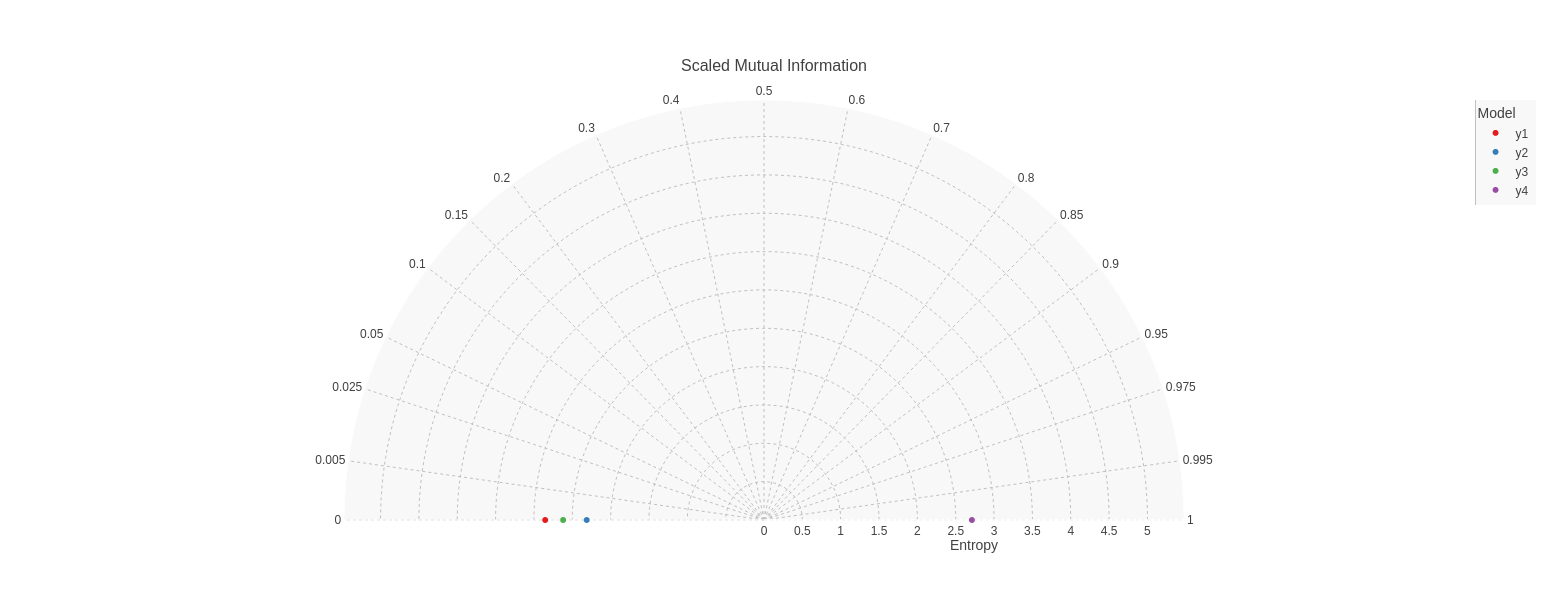

In [6]:
chart_taylor_res = diag.chart_create_diagram(df_taylor_res, string_ref_model, string_mid_type='scaled', string_diagram_type='mid')
chart_taylor_res.show()

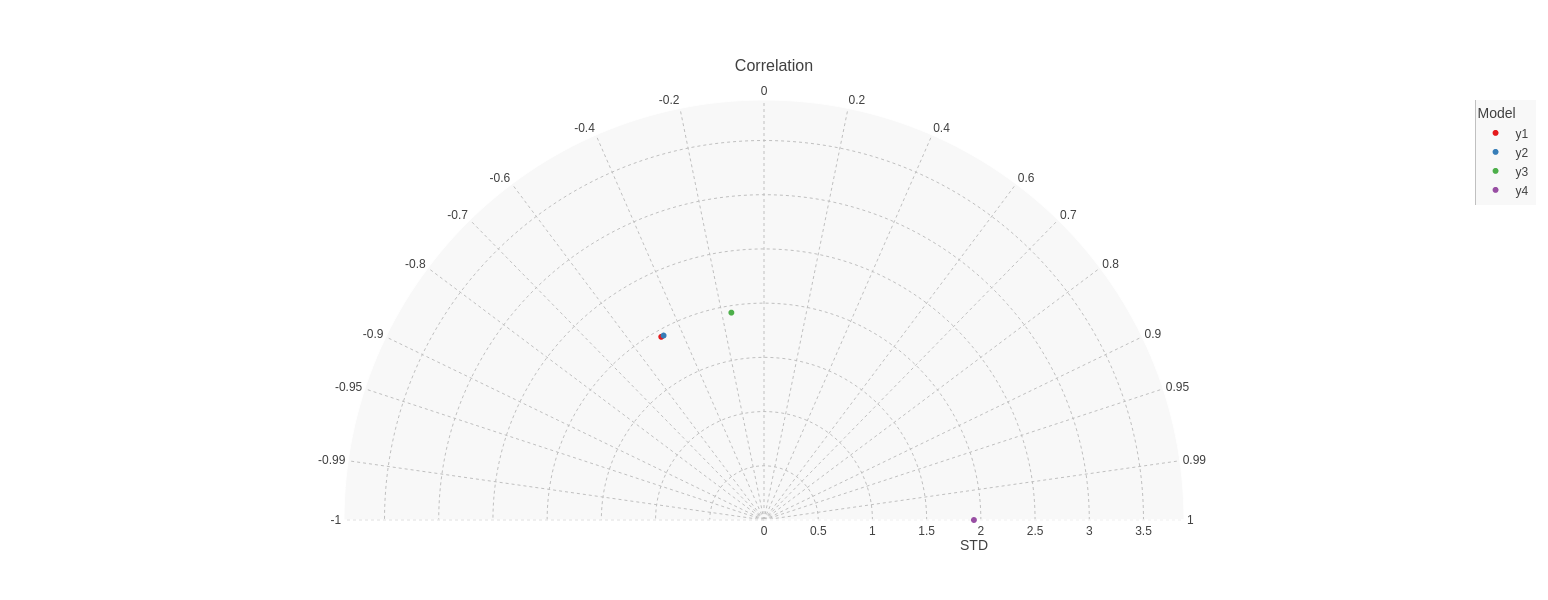

In [7]:
chart_taylor_res = diag.chart_create_diagram(df_taylor_res, string_ref_model, string_mid_type='scaled', string_diagram_type='taylor')
chart_taylor_res.show()

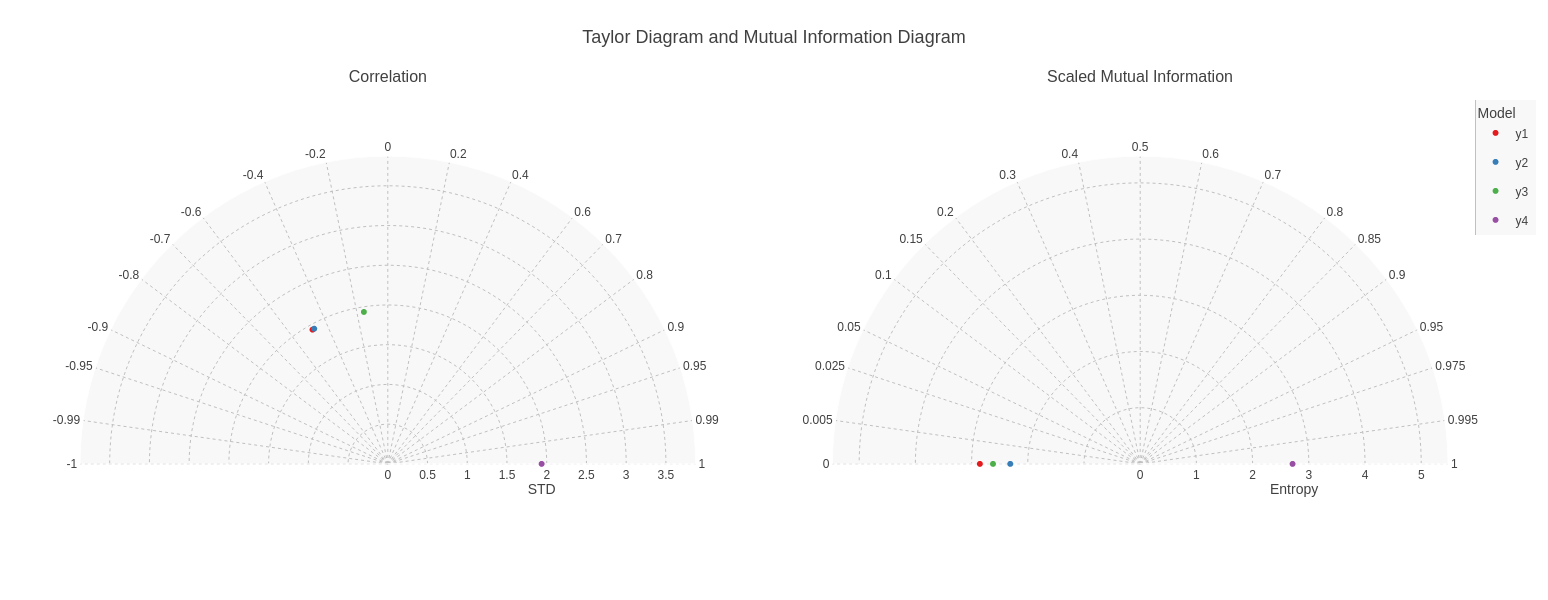

In [8]:
diag.chart_create_all_diagrams(df_anscombes_quartet_modified, string_ref_model, 'pearson', string_type_mid)

In [9]:
df_mi_res_npeet = diag.calculate_mid_properties(df_anscombes_quartet_modified, string_ref_model, 'npeet')
df_mi_res_npeet

Model   Entropy  Mutual_information  Fixed_MI  Scaled_entropy  \
0    y1  3.389044           -0.046424 -0.090947        1.094441   
1    y2  2.753054           -0.026647 -0.052203        0.889057   
2    y3  2.929475           -0.049547 -0.097065        0.946030   
3    y4  3.096598            1.580667  3.096598        1.000000   

   Normalized_MI  Angle_NMI  Joint_entropies  Scaled_MI  Angle_SMI  \
0      -0.028074  91.608753         6.576589  -0.056994      180.0   
1      -0.017879  91.024452         5.901855  -0.036140      180.0   
2      -0.032227  91.846814         6.123138  -0.065518      180.0   
3       1.000000   0.000000         3.096598   1.000000        0.0   

   Root_Entropy  
0      1.840936  
1      1.659233  
2      1.711571  
3      1.759715

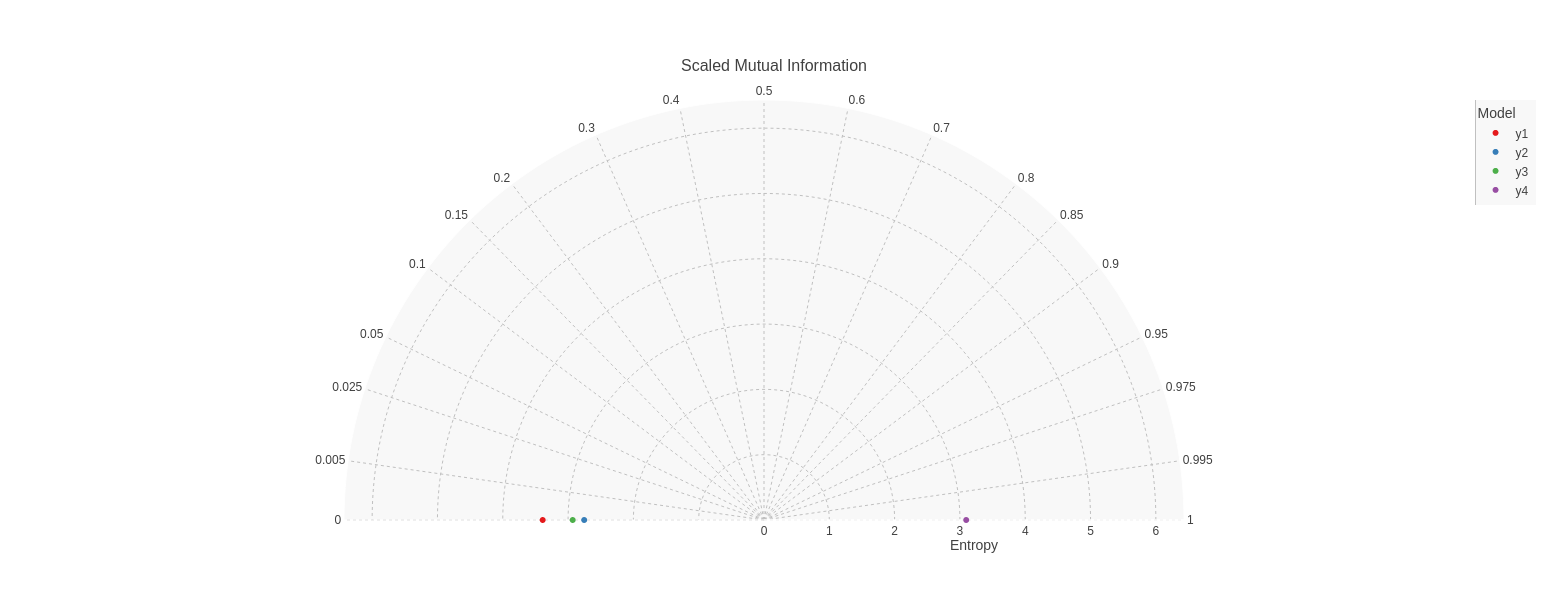

In [10]:
chart_mi_res = diag.chart_create_diagram(df_mi_res_npeet, string_ref_model, string_mid_type='scaled', string_diagram_type='mid')
chart_mi_res.show()

In [11]:
df_mi_res = diag.calculate_mid_properties(df_anscombes_quartet_modified, string_ref_model, 'scipy_sklearn')
df_mi_res

Model   Entropy  Mutual_information  Fixed_MI  Scaled_entropy  \
0    y1  2.852820            0.000000  0.000000        1.052292   
1    y2  2.312211            0.000000  0.000000        0.852883   
2    y3  2.618974            0.000000  0.000000        0.966036   
3    y4  2.711054            1.095635  2.711054        1.000000   

   Normalized_MI  Angle_NMI  Joint_entropies  Scaled_MI  Angle_SMI  \
0            0.0       90.0         5.563874        0.0      180.0   
1            0.0       90.0         5.023265        0.0      180.0   
2            0.0       90.0         5.330028        0.0      180.0   
3            1.0        0.0         2.711054        1.0        0.0   

   Root_Entropy  
0      1.689029  
1      1.520596  
2      1.618325  
3      1.646528

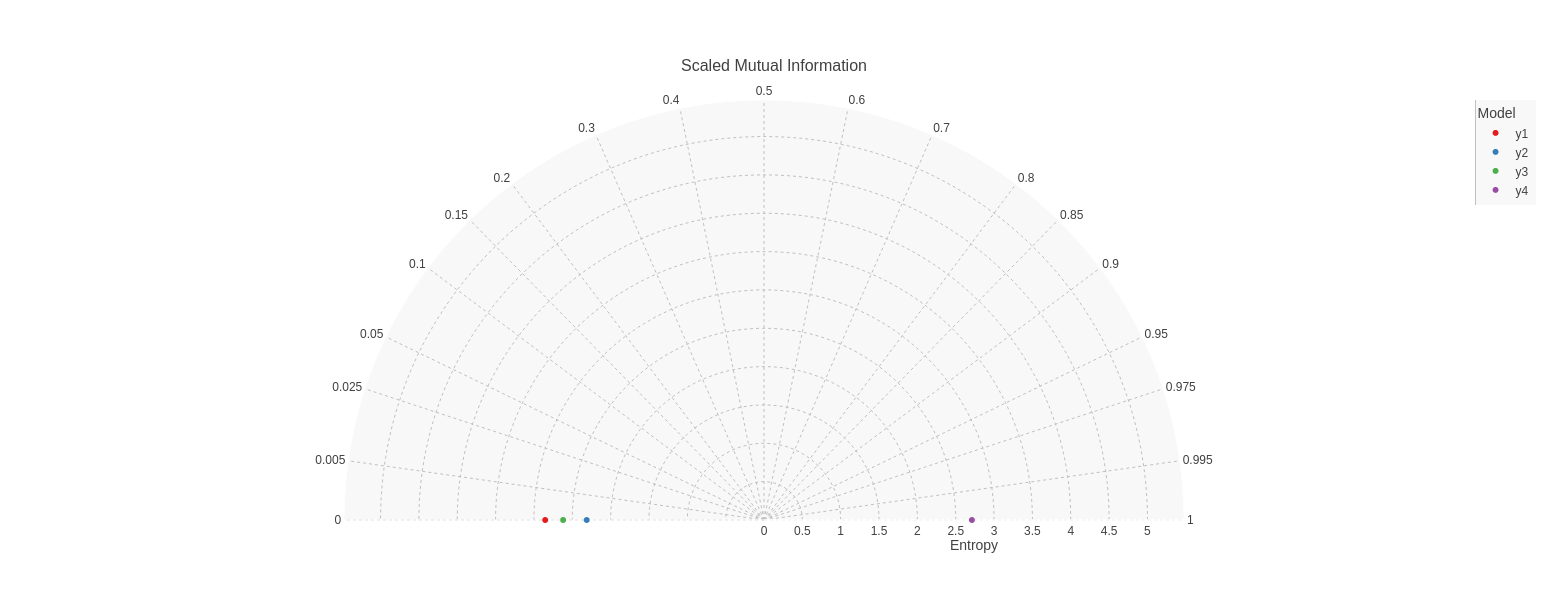

In [12]:
chart_mi_res = diag.chart_create_diagram(df_mi_res, string_ref_model, string_mid_type='scaled', string_diagram_type='mid')
chart_mi_res.show()

## Example 2: CMIP3 Dataset - Historical Temperature Experiment
---

**IMPORTANT**
* How to generate wget script: https://esgf.github.io/esgf-user-support/faq.html#how-to-preserve-the-directory-structure
* Link to wget script used here: https://esgf-data.dkrz.de/esg-search/wget?download_structure=model&project=CMIP3&experiment=historical&ensemble=run1&variable=ts

---

In [13]:
import cftime
import datetime as dt
import xarray
from netCDF4 import Dataset, date2index, num2date, date2num

def test_dataset_1():
    
    # IMPORTANT
    ###########################################################################
    # How to generate wget script: https://esgf.github.io/esgf-user-support/faq.html#how-to-preserve-the-directory-structure
    # Link to wget script used here: https://esgf-data.dkrz.de/esg-search/wget?download_structure=model&project=CMIP3&experiment=historical&ensemble=run1&variable=ts
    ###########################################################################
    
    path_root_data = os.path.join('..', 'Data')
    path_dataset_1 = os.path.join(path_root_data, 'Dataset_1', 'Files')
    
    float_kelvin = 273.15
    
    list_datetimes = []
    list_temperatures = []
    list_models = []
    
    # Each name is encoded as a directory name
    list_model_names = [i for i in os.listdir(path_dataset_1)
                        if os.path.isdir(os.path.join(path_dataset_1, i))]
    
    for i, string_one_model in enumerate(list_model_names):
        path_one_model_dir = os.path.join(path_dataset_1, string_one_model)
        
        if string_one_model in ['ncar_ccsm3_0', 'mri_cgcm2_3_2a']:
            continue
        
        for j, string_one_model_file in enumerate(os.listdir(path_one_model_dir)):
        
            path_one_model_file = os.path.join(
                path_one_model_dir, string_one_model_file)
            
            ds_one_model_file = xarray.open_dataset(
                path_one_model_file, decode_times=True, use_cftime=True)
            
            try:
                # Time slicing for the 20th century
                ds_one_model_file_20th_century = ds_one_model_file.sel(
                    time=slice('1900-01-01','2000-01-01'))

                # Anual resampling
                ds_one_model_file_20th_century_mean = ds_one_model_file_20th_century.resample(time='AS').mean()

                ds_one_model_file_temperature = ds_one_model_file_20th_century_mean.variables['ts'].to_numpy()
                ds_one_model_file_time = ds_one_model_file_20th_century_mean.indexes['time'].to_datetimeindex()

                list_datetimes += ds_one_model_file_time.tolist()

                # Taking geographicall mean besides temporal
                np_tmp_temp = np.array(ds_one_model_file_temperature)
                list_geographically_mean_temperatures = np_tmp_temp.mean(axis=(1,2)).tolist()
                list_temperatures += list_geographically_mean_temperatures

                list_models += [string_one_model] * len(list_geographically_mean_temperatures)
            
            except:
                continue
    
    df_dataset_1 = pd.DataFrame(
        {'Datetime': list_datetimes, 'Temperature': list_temperatures,
         'Model': list_models})
    
    return df_dataset_1


df_dataset_1 = test_dataset_1()
df_dataset_1

/tmp/ipykernel_31035/261608704.py:50: RuntimeWarning:

Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.

/tmp/ipykernel_31035/261608704.py:50: RuntimeWarning:

Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.

/tmp/ipykernel_31035/261608704.py:50: RuntimeWarning:

Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.

/tmp/ipykernel_31035/261608704.py:50: RuntimeWarning:

Converting a CFTimeIndex with dates from a non-

Datetime  Temperature        Model
0    1900-01-01   277.076477     inmcm3_0
1    1901-01-01   277.123596     inmcm3_0
2    1902-01-01   277.183899     inmcm3_0
3    1903-01-01   277.028564     inmcm3_0
4    1904-01-01   277.259094     inmcm3_0
...         ...          ...          ...
2195 1995-01-01   277.791870  ukmo_hadcm3
2196 1996-01-01   277.680725  ukmo_hadcm3
2197 1997-01-01   277.992981  ukmo_hadcm3
2198 1998-01-01   277.921051  ukmo_hadcm3
2199 1999-01-01   277.572052  ukmo_hadcm3

[2200 rows x 3 columns]

In [14]:
df_dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     2200 non-null   datetime64[ns]
 1   Temperature  2200 non-null   float64       
 2   Model        2200 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.7+ KB


In [15]:
df_dataset_1['Model'].unique()

array(['inmcm3_0', 'cccma_cgcm3_1_t63', 'ingv_echam4', 'iap_fgoals1_0_g',
       'miub_echo_g', 'giss_model_e_h', 'gfdl_cm2_1', 'giss_model_e_r',
       'bccr_bcm2_0', 'csiro_mk3_0', 'ukmo_hadgem1', 'gfdl_cm2_0',
       'mpi_echam5', 'miroc3_2_medres', 'ncar_pcm1', 'csiro_mk3_5',
       'giss_aom', 'miroc3_2_hires', 'ipsl_cm4', 'cccma_cgcm3_1',
       'cnrm_cm3', 'ukmo_hadcm3'], dtype=object)

In [16]:
len(df_dataset_1['Model'].unique())

22

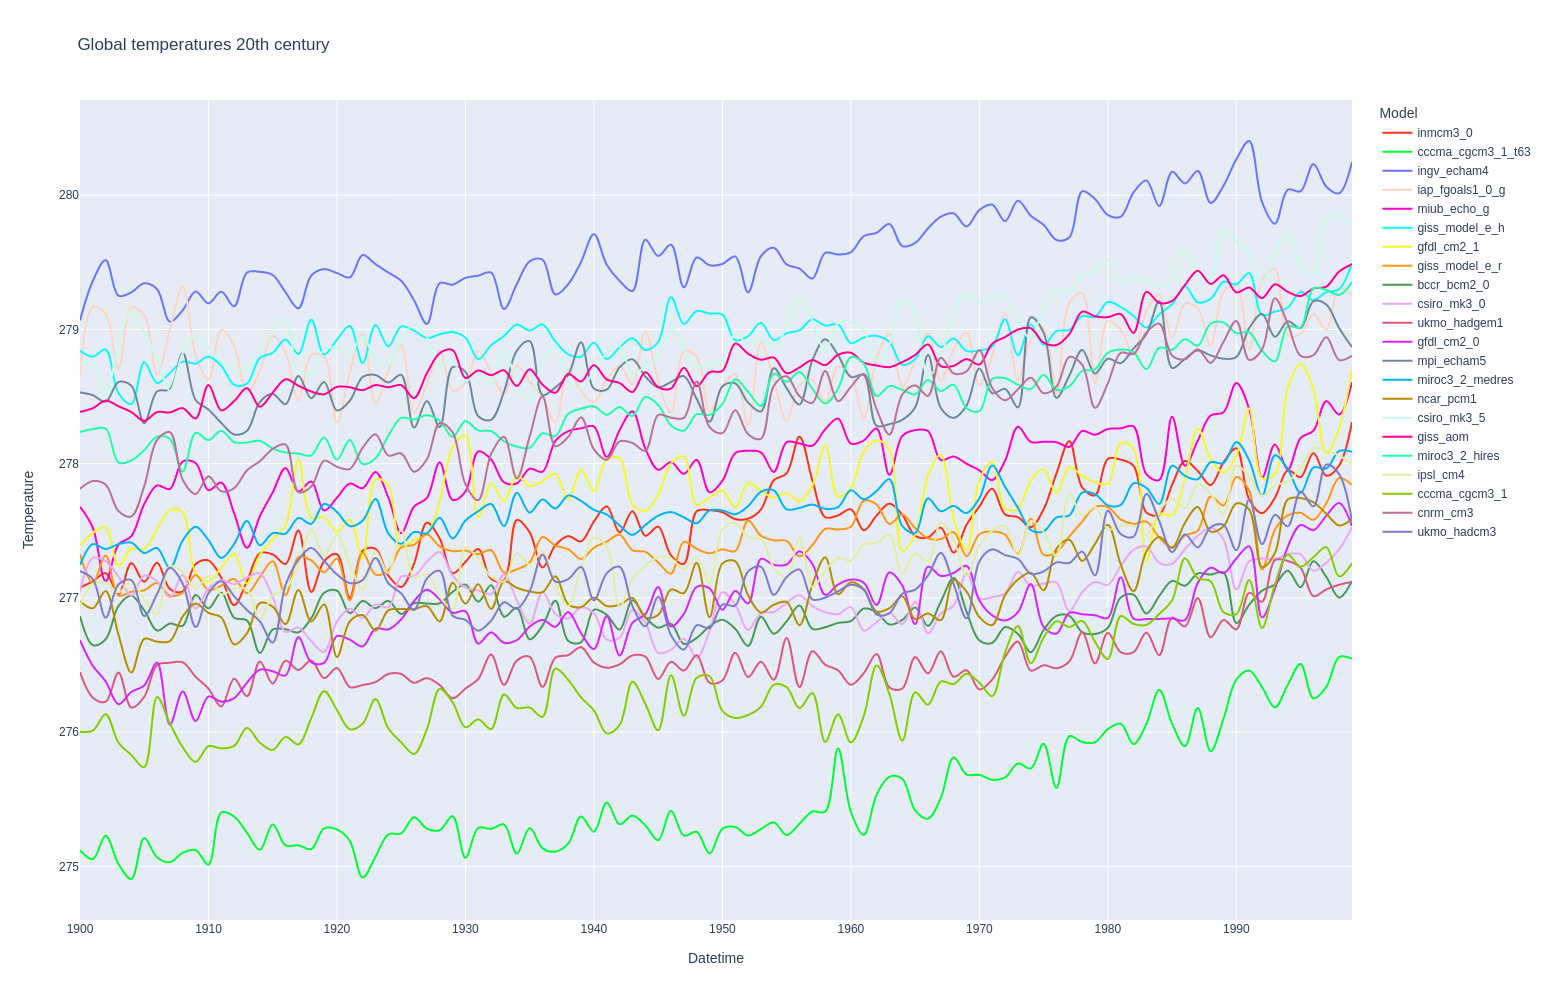

In [17]:
fig = px.line(df_dataset_1, x='Datetime', y='Temperature', color='Model',
              title='Global temperatures 20th century', render_mode='svg',
              line_shape='spline',
              color_discrete_sequence=px.colors.qualitative.Light24,)
fig.update_layout(height=1000)
fig.show()

In [18]:
df_dataset_1_pivoted = pd.pivot(df_dataset_1, index=['Datetime'], columns=['Model'], values=['Temperature']).reset_index(drop=True)
df_dataset_1_pivoted.columns = df_dataset_1_pivoted.columns.get_level_values(1)
df_dataset_1_pivoted

Model  bccr_bcm2_0  cccma_cgcm3_1  cccma_cgcm3_1_t63    cnrm_cm3  csiro_mk3_0  \
0       276.865601     276.002563         275.119843  277.812378   277.047333   
1       276.648376     276.011749         275.053864  277.870117   277.297546   
2       276.692078     276.133514         275.228760  277.842987   277.272705   
3       276.940002     275.921570         275.017639  277.646393   277.158569   
4       277.016418     275.829468         274.906097  277.607147   277.016510   
..             ...            ...                ...         ...          ...   
95      277.078735     277.233032         276.508240  278.803253   277.323029   
96      277.273438     277.303558         276.251526  278.808105   277.202087   
97      277.156433     277.377502         276.336853  278.942139   277.261566   
98      277.002075     277.158752         276.559875  278.771912   277.361115   
99      277.125671     277.257141         276.546936  278.803619   277.525391   

Model  csiro_mk3_5  gfdl_cm2_0  gfdl_cm2_1    giss_aom  giss_model_e_h  ...  \
0       278.742828  276.684692  277.390442  278.385315      278.841309  ...   
1       278.746216  276.494141  277.485474  278.412415      278.796906  ...   
2       278.516357  276.377502  277.523804  278.469360      278.850769  ...   
3       278.891052  276.207672  277.239960  278.427094      278.524261  ...   
4       279.138519  276.300018  277.364685  278.384064      278.444336  ...   
..             ...         ...         ...         ...             ...  ...   
95      279.473785  277.543152  278.742798  279.248108      279.280243  ...   
96      279.412689  277.504211  278.555969  279.304291      279.218414  ...   
97      279.846802  277.612183  278.072968  279.318207      279.276794  ...   
98      279.829834  277.706665  278.265320  279.430756      279.299530  ...   
99      279.779663  277.535767  278.704620  279.485809      279.491913  ...   

Model  ingv_echam4    inmcm3_0    ipsl_cm4  miroc3_2_hires  miroc3_2_medres  \
0       279.066498  277.076477  276.943085      278.235901       277.244904   
1       279.361145  277.123596  277.102478      278.256470       277.400635   
2       279.515869  277.183899  277.114075      278.261261       277.363922   
3       279.250458  277.028564  277.040771      278.007935       277.399963   
4       279.276093  277.259094  277.124786      278.023560       277.411346   
..             ...         ...         ...             ...              ...   
95      280.028534  277.899567  277.970917      279.014557       277.781433   
96      280.230988  278.078400  278.116333      279.305420       277.970764   
97      280.062958  277.909790  278.096161      279.293823       277.964844   
98      280.013428  277.985931  278.060577      279.256287       278.093384   
99      280.246033  278.309784  277.996429      279.351715       278.088898   

Model  miub_echo_g  mpi_echam5   ncar_pcm1  ukmo_hadcm3  ukmo_hadgem1  
0       277.678986  278.530609  276.974762   277.199677    276.447510  
1       277.522614  278.509583  276.922485   277.139191    276.256592  
2       277.123749  278.461151  277.050232   276.853088    276.226593  
3       277.397949  278.607269  276.724640   277.101227    276.443298  
4       277.459534  278.580688  276.444580   277.132538    276.183167  
..             ...         ...         ...          ...           ...  
95      278.191223  279.009399  277.743652   277.791870    277.224091  
96      278.244751  279.209564  277.712982   277.680725    277.012482  
97      278.465179  279.184357  277.626801   277.992981    277.063293  
98      278.365509  279.009308  277.539246   277.921051    277.097687  
99      278.606384  278.867401  277.588501   277.572052    277.118530  

[100 rows x 22 columns]

In [19]:
df_dataset_1_mid = diag.calculate_mid_properties(df_dataset_1_pivoted, 'bccr_bcm2_0', 'scipy_sklearn')
df_dataset_1_mid

Model   Entropy  Mutual_information  Fixed_MI  Scaled_entropy  \
0         bccr_bcm2_0 -0.731772            3.344044 -0.731772        1.000000   
1       cccma_cgcm3_1  0.491545            0.200957 -0.043975       -0.671718   
2   cccma_cgcm3_1_t63  0.408123            0.143259 -0.031349       -0.557719   
3            cnrm_cm3  0.565183            0.178099 -0.038973       -0.772348   
4         csiro_mk3_0 -0.196525            0.132368 -0.028966        0.268560   
5         csiro_mk3_5  0.257756            0.131548 -0.028786       -0.352235   
6          gfdl_cm2_0  0.417713            0.088154 -0.019291       -0.570823   
7          gfdl_cm2_1  0.388671            0.000000 -0.000000       -0.531137   
8            giss_aom  0.026597            0.194888 -0.042647       -0.036346   
9      giss_model_e_h -0.323224            0.142521 -0.031188        0.441701   
10     giss_model_e_r -0.331292            0.000000 -0.000000        0.452726   
11    iap_fgoals1_0_g  0.094869            0.000000 -0.000000       -0.129643   
12        ingv_echam4  0.260275            0.318694 -0.069739       -0.355677   
13           inmcm3_0  0.280451            0.160111 -0.035037       -0.383249   
14           ipsl_cm4  0.147403            0.131681 -0.028816       -0.201433   
15     miroc3_2_hires  0.280536            0.258658 -0.056602       -0.383366   
16    miroc3_2_medres -0.352516            0.183244 -0.040099        0.481730   
17        miub_echo_g  0.139946            0.029003 -0.006347       -0.191242   
18         mpi_echam5 -0.160114            0.103570 -0.022664        0.218803   
19          ncar_pcm1  0.047149            0.118523 -0.025936       -0.064431   
20        ukmo_hadcm3  0.126401            0.114667 -0.025092       -0.172733   
21       ukmo_hadgem1 -0.372435            0.163712 -0.035825        0.508949   

    Normalized_MI   Angle_NMI  Joint_entropies  Scaled_MI   Angle_SMI  \
0       -1.000000  180.000000        -0.731772   1.000000    0.000001   
1        1.000000    0.000000        -0.196252  -0.023993  180.000000   
2        1.000000    0.000000        -0.292300  -0.030682  180.000000   
3        1.000000    0.000000        -0.127616  -0.012026  180.000000   
4       -0.076382   94.380620        -0.899331   0.181139  129.622110   
5        1.000000    0.000000        -0.445230  -0.067950  180.000000   
6        1.000000    0.000000        -0.294769  -0.018603  180.000000   
7        1.000000    0.000000        -0.343100  -0.000000  180.000000   
8        1.000000    0.000000        -0.662528  -1.451739  180.000000   
9       -0.064127   93.676744        -1.023809   0.134996  136.887035   
10      -0.000000   90.000000        -1.063064   0.000000  180.000000   
11       1.000000    0.000000        -0.636903  -0.000000  180.000000   
12       1.000000    0.000000        -0.401758  -0.147108  180.000000   
13       1.000000    0.000000        -0.416284  -0.071069  180.000000   
14       1.000000    0.000000        -0.555554  -0.148413  180.000000   
15       1.000000    0.000000        -0.394634  -0.108808  180.000000   
16      -0.078951   94.528268        -1.044189   0.162315  132.482869   
17       1.000000    0.000000        -0.585480  -0.036284  180.000000   
18      -0.066212   93.796451        -0.869221   0.168138  131.584518   
19       1.000000    0.000000        -0.658687  -0.495152  180.000000   
20       1.000000    0.000000        -0.580278  -0.157416  180.000000   
21      -0.068623   93.934912        -1.068382   0.140438  135.982209   

    Root_Entropy  
0      -1.000000  
1       0.701102  
2       0.638845  
3       0.751786  
4      -1.000000  
5       0.507697  
6       0.646307  
7       0.623435  
8       0.163085  
9      -1.000000  
10     -1.000000  
11      0.308009  
12      0.510171  
13      0.529576  
14      0.383931  
15      0.529657  
16     -1.000000  
17      0.374093  
18     -1.000000  
19      0.217138  
20      0.355530  
21     -1.000000

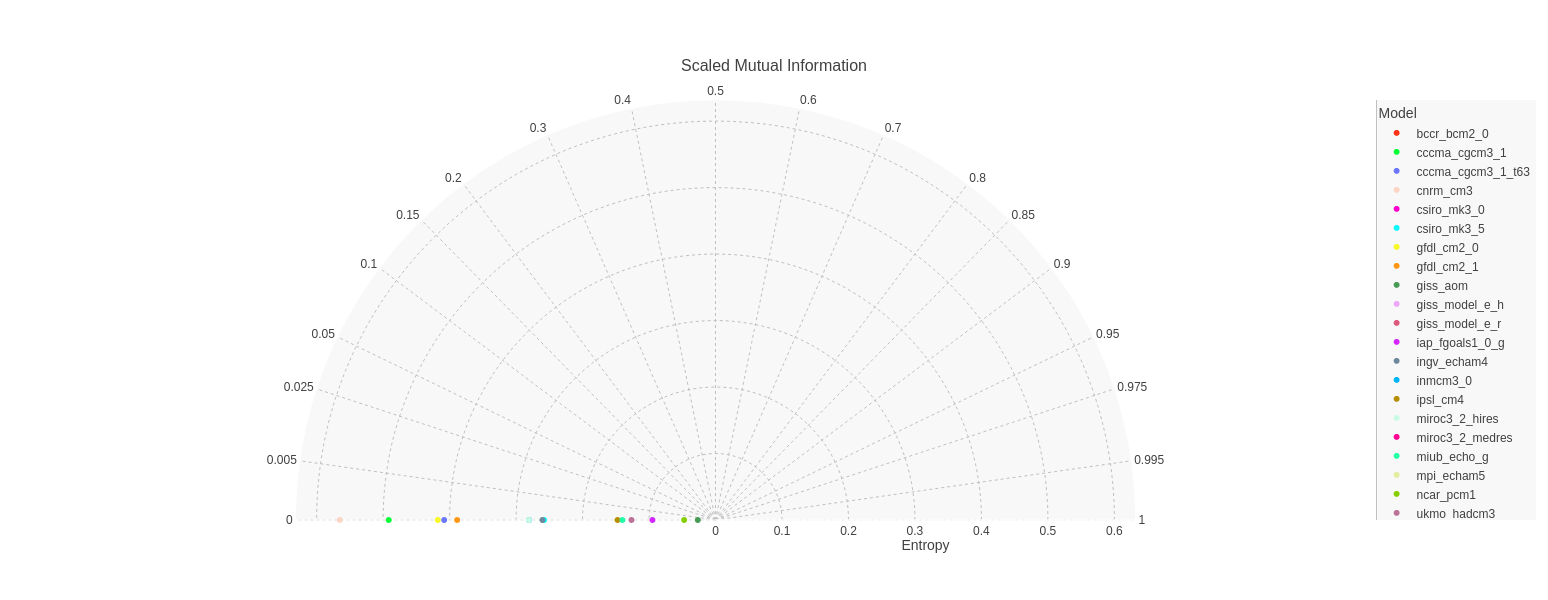

In [20]:
chart_mi_res = diag.chart_create_diagram(df_dataset_1_mid, 'bccr_bcm2_0', string_mid_type=string_type_mid, string_diagram_type='mid')
chart_mi_res.show()

In [21]:
df_dataset_1_mid = diag.calculate_mid_properties(df_dataset_1_pivoted, 'bccr_bcm2_0', 'npeet')
df_dataset_1_mid

Model   Entropy  Mutual_information  Fixed_MI  Scaled_entropy  \
0         bccr_bcm2_0 -0.517006            4.824436 -0.517006        1.000000   
1       cccma_cgcm3_1  0.487523            0.149503 -0.016021       -0.942974   
2   cccma_cgcm3_1_t63  0.283946            0.225622 -0.024179       -0.549213   
3            cnrm_cm3  0.680123            0.241768 -0.025909       -1.315504   
4         csiro_mk3_0 -0.036218            0.192487 -0.020628        0.070054   
5         csiro_mk3_5  0.505146            0.078623 -0.008426       -0.977060   
6          gfdl_cm2_0  0.497832            0.220792 -0.023661       -0.962914   
7          gfdl_cm2_1  0.670256            0.155242 -0.016636       -1.296419   
8            giss_aom  0.012451            0.175223 -0.018778       -0.024083   
9      giss_model_e_h -0.340753            0.226809 -0.024306        0.659090   
10     giss_model_e_r -0.113555           -0.025747  0.002759        0.219639   
11    iap_fgoals1_0_g  0.017403           -0.054712  0.005863       -0.033660   
12        ingv_echam4  0.359017            0.471855 -0.050566       -0.694416   
13           inmcm3_0  0.355008            0.267365 -0.028652       -0.686662   
14           ipsl_cm4  0.288760            0.173070 -0.018547       -0.558524   
15     miroc3_2_hires  0.244315            0.426565 -0.045712       -0.472559   
16    miroc3_2_medres -0.330159            0.280310 -0.030039        0.638597   
17        miub_echo_g  0.088619           -0.020669  0.002215       -0.171408   
18         mpi_echam5 -0.165392            0.233386 -0.025011        0.319903   
19          ncar_pcm1  0.059870            0.141056 -0.015116       -0.115801   
20        ukmo_hadcm3  0.300632            0.182137 -0.019518       -0.581486   
21       ukmo_hadgem1 -0.502389            0.213442 -0.022873        0.971727   

    Normalized_MI   Angle_NMI  Joint_entropies  Scaled_MI   Angle_SMI  \
0       -1.000000  180.000000        -0.517006   1.000000    0.000000   
1        1.000000    0.000000        -0.013461  -0.000856  180.000000   
2        1.000000    0.000000        -0.208881  -0.034403  180.000000   
3        1.000000    0.000000         0.189026   0.013928  166.444671   
4       -0.150744   98.670041        -0.532596   0.586715   80.012740   
5        1.000000    0.000000        -0.003434  -0.000111  180.000000   
6        1.000000    0.000000         0.004487   0.000413  177.672450   
7        1.000000    0.000000         0.169887   0.008156  169.636987   
8        1.000000    0.000000        -0.485777  -1.417014  180.000000   
9       -0.057908   93.319759        -0.833453   0.114989  140.355954   
10       0.011388   89.347526        -0.633319  -0.029765  180.000000   
11       1.000000    0.000000        -0.505466   0.329393  109.950795   
12       1.000000    0.000000        -0.107423  -0.029265  180.000000   
13       1.000000    0.000000        -0.133346  -0.020816  180.000000   
14       1.000000    0.000000        -0.209699  -0.026051  180.000000   
15       1.000000    0.000000        -0.226978  -0.082143  180.000000   
16      -0.072707   94.169497        -0.817125   0.143799  135.430608   
17       1.000000    0.000000        -0.430602   0.020817  163.408644   
18      -0.085530   94.906498        -0.657387   0.192280  127.983875   
19       1.000000    0.000000        -0.442020  -0.215863  180.000000   
20       1.000000    0.000000        -0.196855  -0.024721  180.000000   
21      -0.044881   92.572347        -0.996521   0.087757  145.536492   

    Root_Entropy  
0      -1.000000  
1       0.698229  
2       0.532866  
3       0.824696  
4      -1.000000  
5       0.710736  
6       0.705572  
7       0.818692  
8       0.111584  
9      -1.000000  
10     -1.000000  
11      0.131919  
12      0.599180  
13      0.595826  
14      0.537364  
15      0.494283  
16     -1.000000  
17      0.297689  
18     -1.000000  
19      0.244683  
20      0.548299  
21     -1.000000

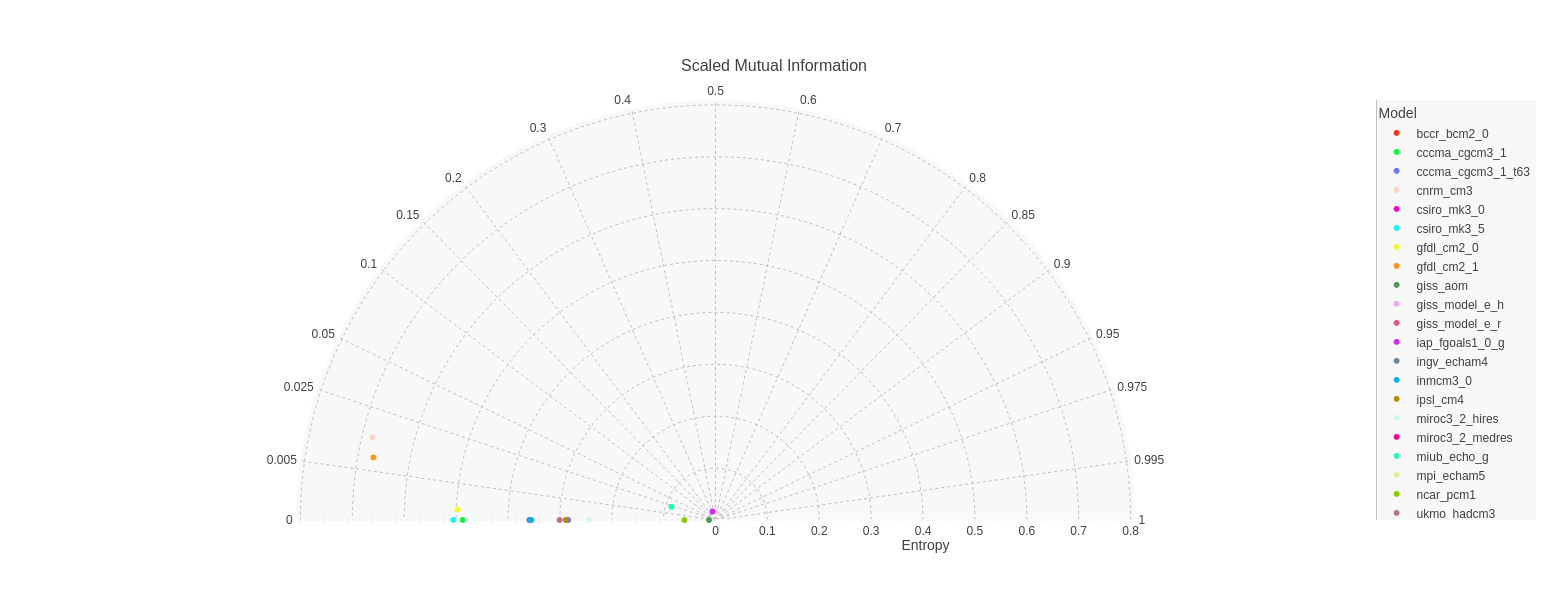

In [22]:
chart_mi_res = diag.chart_create_diagram(df_dataset_1_mid, 'bccr_bcm2_0', string_mid_type=string_type_mid, string_diagram_type='mid')
chart_mi_res.show()

In [23]:
df_dataset_1_td = diag.calculate_td_properties (df_dataset_1_pivoted, 'bccr_bcm2_0')
df_dataset_1_td

Model       STD  Correlation      Angle       RMS  \
0         bccr_bcm2_0  0.150708     1.000000   0.000000  0.000000   
1       cccma_cgcm3_1  0.421117     0.447744  63.400940  0.651690   
2   cccma_cgcm3_1_t63  0.426046     0.408067  65.916517  1.429422   
3            cnrm_cm3  0.381168     0.231036  76.641935  1.518590   
4         csiro_mk3_0  0.217599     0.456389  62.845662  0.246113   
5         csiro_mk3_5  0.329518     0.434916  64.220078  2.148455   
6          gfdl_cm2_0  0.339364     0.246686  75.718534  0.336084   
7          gfdl_cm2_1  0.328633     0.250612  75.486247  0.952518   
8            giss_aom  0.298304     0.407816  65.932268  1.915679   
9      giss_model_e_h  0.191953     0.327887  70.859409  2.085016   
10     giss_model_e_r  0.204082     0.202556  78.313556  0.550592   
11    iap_fgoals1_0_g  0.275984     0.265176  74.622571  1.932807   
12        ingv_echam4  0.314295     0.319038  71.395244  2.728204   
13           inmcm3_0  0.313439     0.222387  77.150709  0.722857   
14           ipsl_cm4  0.292139     0.441155  63.822414  0.544193   
15     miroc3_2_hires  0.323302     0.386121  67.286663  1.618969   
16    miroc3_2_medres  0.196674     0.343557  69.906277  0.795419   
17        miub_echo_g  0.266280     0.173241  80.023671  1.154360   
18         mpi_echam5  0.232828     0.219527  77.318748  1.763224   
19          ncar_pcm1  0.282840     0.362574  68.741665  0.325430   
20        ukmo_hadcm3  0.275619     0.395348  66.712330  0.379092   
21       ukmo_hadgem1  0.234121     0.442108  63.761538  0.409120   

    Normalized_RMS  Normalized_STD  
0         0.000000        1.000000  
1         4.324178        2.794250  
2         9.484678        2.826955  
3        10.076338        2.529172  
4         1.633043        1.443843  
5        14.255701        2.186457  
6         2.230024        2.251791  
7         6.320265        2.180585  
8        12.711158        1.979344  
9        13.834764        1.273673  
10        3.653359        1.354153  
11       12.824803        1.831243  
12       18.102523        2.085449  
13        4.796390        2.079770  
14        3.610896        1.938438  
15       10.742389        2.145213  
16        5.277865        1.304996  
17        7.659557        1.766852  
18       11.699565        1.544889  
19        2.159332        1.876735  
20        2.515402        1.828819  
21        2.714645        1.553473

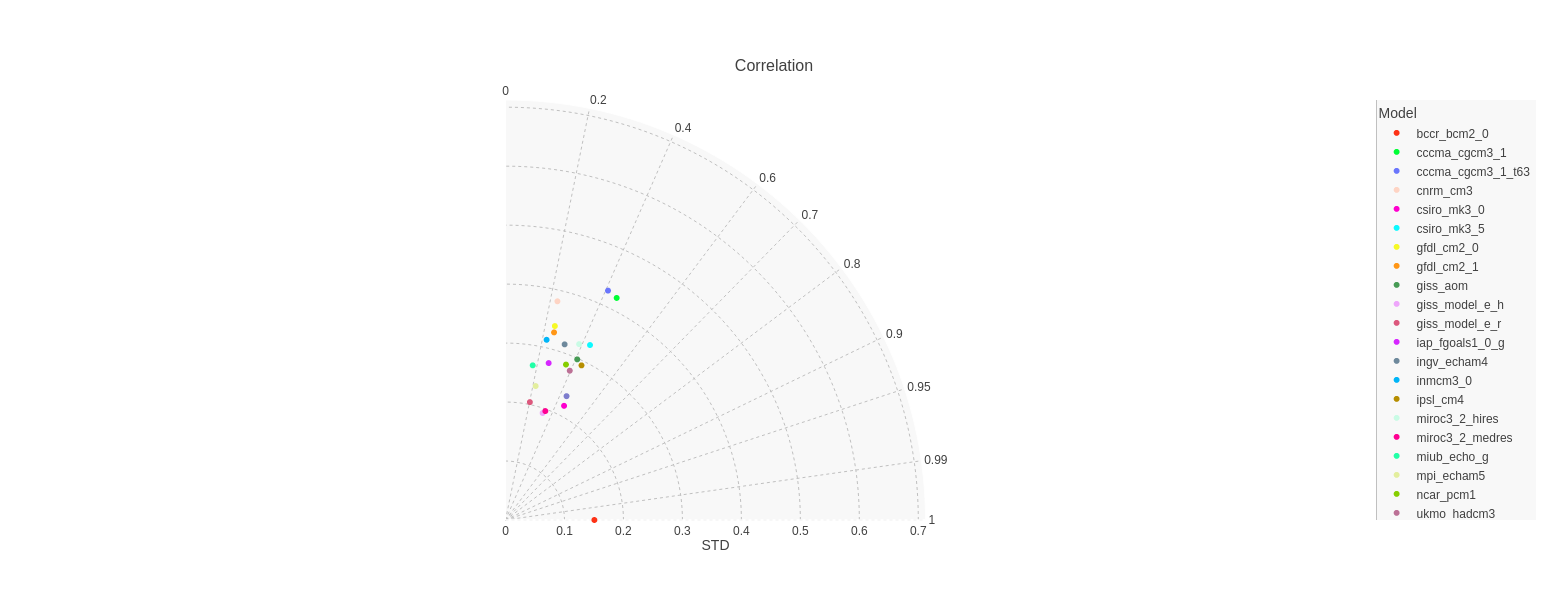

In [24]:
chart_td_res = diag.chart_create_diagram(df_dataset_1_td, 'bccr_bcm2_0', string_mid_type=string_type_mid, string_diagram_type='taylor')
chart_td_res.show()

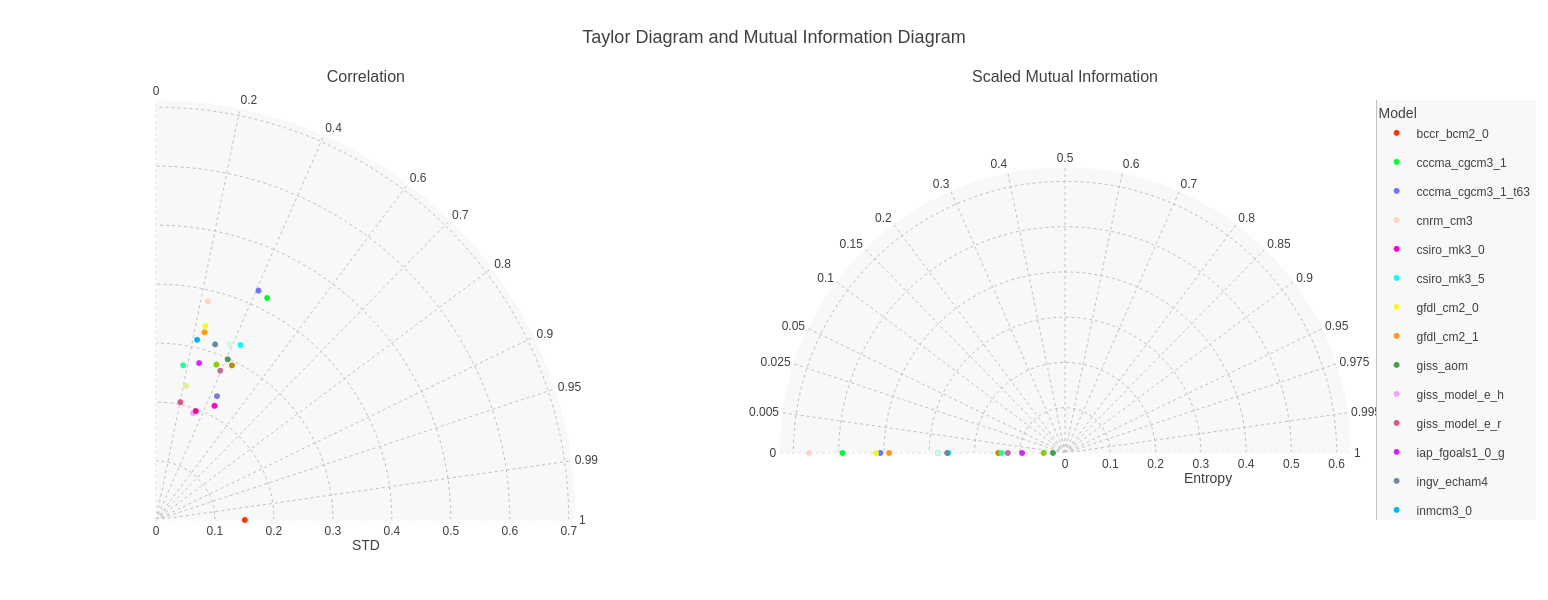

In [25]:
diag.chart_create_all_diagrams(df_dataset_1_pivoted, string_reference_feature='bccr_bcm2_0', string_td_method='pearson', string_mid_type='scaled')

In [26]:
def test_dataset_2():
    path_root_data = os.path.join('..', 'Data')
    path_dataset_2 = os.path.join(path_root_data, 'Dataset_2', 'Splitted_files')
    
    df_result = pd.DataFrame()
    list_dataset_names = []
    
    for string_one_table in os.listdir(path_dataset_2):
        path_one_dataset = os.path.join(path_dataset_2, string_one_table)
        string_one_dataset_name = string_one_table.split('_')[2]
        
        df_one_dataset = pd.read_csv(path_one_dataset)
        df_result = pd.concat([df_result, df_one_dataset], ignore_index=True)
        
        list_dataset_names += [string_one_dataset_name] * df_one_dataset.shape[0]
        
    df_result['Dataset'] = list_dataset_names
    
    return df_result

test_dataset_2()

Method          Parameters                  Phi (μ)     IN (T,Z)  \
0    FCM-I-fs    c=3,σ=0.6,m=1.20    0.947,0.000 (8.0,0.0)  0.845,0.000   
1   FCM-II-fs     c=3,σ=0.6,λ=0.1   0.923,0.017 (11.5,2.6)  0.810,0.024   
2    FCM-I-km       c=3,σ=3,m=2.4   0.907,0.000 (14.0,0.0)  0.766,0.000   
3   FCM-II-km       c=3,σ=5,λ=0.2   0.913,0.000 (13.0,0.0)  0.745,0.000   
4         SVC      c=3,C=1,σ=0.35   0.680,0.000 (48.0,0.0)  0.736,0.000   
5       FCM-I           c=3,m=2.4   0.900,0.000 (15.0,0.0)  0.758,0.000   
6      FCM-II           c=3,λ=5.4   0.913,0.000 (13.0,0.0)  0.745,0.000   
7     K-means                 c=3  0.860,0.083 (21.1,12.5)  0.733,0.061   
8    FCM-I-fs      -c=6,σ=1,m=1.4   0.623,0.019 (80.8,4.1)  0.408,0.006   
9   FCM-II-fs     c=6,σ=0.8,λ=0.2   0.624,0.010 (80.5,2.2)  0.381,0.012   
10   FCM-I-km       c=6,σ=2,m=1.2  0.463,0.000 (115.0,0.0)  0.074,0.000   
11  FCM-II-km    c=6,σ=10,λ=0.001  0.393,0.000 (130.0,0.0)  0.039,0.000   
12        SVC       c=6,C=1,σ=1.3  0.379,0.000 (133.0,0.0)  0.129,0.000   
13      FCM-I           c=6,m=1.8   0.610,0.002 (83.4,0.5)  0.363,0.001   
14     FCM-II           c=6,λ=1.2   0.614,0.038 (82.5,8.2)  0.343,0.027   
15    K-means                 c=6   0.571,0.015 (91.7,3.2)  0.404,0.022   
16   FCM-I-fs       c=3,σ=4,m=1.2   0.563,0.000 (14.0,0.0)  0.300,0.000   
17  FCM-II-fs       c=3,σ=6,λ=0.1   0.581,0.029 (13.4,0.9)  0.290,0.028   
18   FCM-I-km        c=3,σ=70,m=2   0.553,0.035 (14.3,1.1)  0.293,0.048   
19  FCM-II-km     c=3,σ=10,λ=0.06   0.603,0.015 (12.7,0.5)  0.328,0.005   
20        SVC       c=4,C=1,σ=1.9   0.500,0.000 (16.0,0.0)  0.173,0.000   
21      FCM-I           c=3,m=2.2   0.548,0.030 (14.5,0.9)  0.285,0.061   
22     FCM-II             c=3,λ=5   0.633,0.042 (11.8,1.3)  0.363,0.000   
23    K-means                 c=3   0.538,0.024 (14.8,0.8)  0.279,0.055   
24   FCM-I-fs     c=7,σ=0.6,m=1.6   0.732,0.001 (90.0,0.2)  0.459,0.001   
25  FCM-II-fs    c=7,σ=0.8,λ=0.09   0.727,0.009 (91.8,2.9)  0.455,0.012   
26   FCM-I-km     c=7,σ=0.1,m=1.2  0.446,0.000 (186.0,0.0)  0.046,0.000   
27  FCM-II-km   c=7,σ=0.1,λ=0.002  0.443,0.000 (187.0,0.0)  0.045,0.000   
28        SVC      c=7,C=1,σ=0.22  0.446,0.000 (186.0,0.0)  0.148,0.000   
29      FCM-I           c=7,m=1.6   0.724,0.001 (92.8,0.4)  0.458,0.004   
30     FCM-II          c=7,λ=0.06   0.720,0.009 (94.1,3.1)  0.453,0.015   
31    K-means                 c=7   0.705,0.016 (99.0,5.4)  0.429,0.024   
32   FCM-I-fs     c=3,σ=7.2,m=1.2   0.972,0.003 (18.9,2.2)  0.702,0.039   
33  FCM-II-fs      c=2,σ=8,λ=0.35   0.972,0.000 (19.0,0.0)  0.814,0.000   
34   FCM-I-km     c=2,σ=0.1,m=1.2  0.653,0.000 (237.0,0.0)  0.009,0.000   
35  FCM-II-km   c=2,σ=0.01,λ=0.02  0.652,0.000 (238.0,0.0)  0.007,0.000   
36        SVC      c=3,C=1,σ=3.75  0.652,0.000 (238.0,0.0)  0.018,0.000   
37      FCM-I           c=2,m=1.2   0.960,0.000 (27.0,0.0)  0.748,0.000   
38     FCM-II           c=2,λ=400   0.972,0.000 (19.0,0.2)  0.812,0.002   
39    K-means                 c=2   0.960,0.000 (27.0,0.0)  0.748,0.000   

         H (T|Z) Dataset  
0    0.172,0.000    Iris  
1    0.214,0.029    Iris  
2    0.260,0.000    Iris  
3    0.283,0.000    Iris  
4    0.453,0.000    Iris  
5    0.270,0.000    Iris  
6    0.283,0.000    Iris  
7    0.309,0.087    Iris  
8    0.856,0.013   Glass  
9    0.898,0.018   Glass  
10   1.391,0.000   Glass  
11   1.451,0.000   Glass  
12   1.443,0.000   Glass  
13  0.946,0.0009   Glass  
14  0.976,0.0349   Glass  
15   0.948,0.026   Glass  
16   0.760,0.000    Lung  
17   0.777,0.024    Lung  
18   0.788,0.054    Lung  
19   0.754,0.009    Lung  
20   0.970,0.000    Lung  
21   0.790,0.065    Lung  
22   0.707,0.011    Lung  
23   0.796,0.055    Lung  
24   0.731,0.002   Ecoli  
25   0.739,0.022   Ecoli  
26   1.446,0.000   Ecoli  
27   1.448,0.000   Ecoli  
28   1.450,0.000   Ecoli  
29   0.738,0.007   Ecoli  
30   0.746,0.025   Ecoli  
31   0.790,0.047   Ecoli  
32   0.103,0.014  Breast  
33   0.116,0.